<img src="./figures/logo_SU.png" style="height:100px">

# Méthode de Rayleigh pour estimer la fréquence propre d'un système complexe

On considère une même poutre supportant à son extrémité libre une charge de masse $M$ et supportée en son milieu par un matériau élastique de raideur $k$. Calculer la fréquence fondamentale des vibrations en flexion de ce système, en utilisant la fonction de déplacement $v(x,t)= \phi(t) \left[ 3\left(\dfrac{x}{L}\right)^2 - \left(\dfrac{x}{L}\right)^3 \right].$

<img src="./figures/Poutre_F2.png" style="height:200px">

La méthodologie à employer est celle présentée en cours :
    
* Calculer l'énergie potentielle
* Calculer l'énergie cinétique
* Construire les matrices masse et raideur
* Calculer les pulsations propres
* Calculer les modes propres

In [2]:
from sympy import *
from sympy.interactive.printing import init_printing

init_printing(use_unicode=False, wrap_line=False, no_global=True)

import sympy as sym
import numpy as np

from numpy import linalg as LA
%matplotlib inline
import pylab as plt

# ----------------------------------------------------------------------

x, E, S, k, S, m, CL, S0, Iz, CT = sym.symbols('x E S k S m CL S0 Iz CT')

L = sym.symbols('L',positive=True)

phi = sym.Symbol('phi')
phi1 = sym.Symbol('phi_1')
phi2 = sym.Symbol('phi_2')
phi3 = sym.Symbol('phi_3')

vphi = sym.Symbol('\dot{\phi}')
vphi1 = sym.Symbol('\dot{\phi_1}')
vphi2 = sym.Symbol('\dot{\phi_2}')
vphi3 = sym.Symbol('\dot{\phi_3}')

rho = sym.Symbol('rho')
omg = sym.Symbol('omega')
beta = sym.Symbol('beta')

Text(0.5, 0, 'x/L')

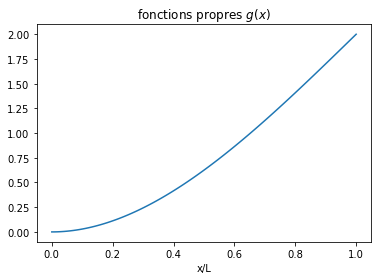

In [3]:
# Visualisation des fonctions de forme

LL = 1 
xx = np.linspace(0, LL, 100)
g  = 3*(xx / LL)**2 -  (xx / LL)**3

plt.figure()
plt.plot(xx,g)
plt.title("fonctions propres $g(x)$")
plt.xlabel("x/L")

L'énergie cinétique de la poutre $T_{poutre} = \displaystyle\dfrac{1}{2} \int_0^L \rho S \left(\dfrac{\partial v(x,t)}{\partial t}\right)^2 \ dx$ a pour expression

In [4]:
def vv2t(x):
    return (3*(x/L)**2 - (x/L)**3)*vphi;

Tpoutre = sym.simplify(Rational(1, 2)*integrate(rho*S*(vv2t(x))**2, (x, 0, L)));

print("Tpoutre =");
Tpoutre

Tpoutre =


L'énergie cinétique de la masse $T_{masse} = \displaystyle\dfrac{1}{2} \int_0^L m \left(\dfrac{\partial v(L,t)}{\partial t}\right)^2 \ dx$ a pour expression

In [7]:
Tmasse = sym.simplify(Rational(1,2)*integrate(m*(vv2t(L))**2, (x, 0, L)));

print("Tmasse =");
Tmasse

Tmasse =


L'énergie cinétique totale est donc

In [9]:
T = Tpoutre + Tmasse;
T

L'énergie de déformation de la poutre $U_{poutre} = \displaystyle\dfrac{1}{2} \int_0^L EI \left(\dfrac{\partial^2 v(x,t)}{\partial x^2}\right)^2 \ dx$ a pour expression

Upoutre =


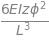

In [11]:
def v2(x):
    return (3*(x/L)**2 - (x/L)**3)*phi;

Upoutre = sym.simplify(Rational(1,2)*integrate(E*Iz*(diff(v2(x), x, x))**2, (x, 0, L)));

print('Upoutre =') 
Upoutre

L'énergie de déformation associée au ressort $U_{ressort} = \displaystyle\dfrac{1}{2} k  \, v(\dfrac{L}{2},t)^2$ a pour expression

In [12]:
Uressort = sym.simplify(Rational(1,2)*k*(v2(L/2))**2);

print('Uressort =') 
Uressort

Uressort =


L'énergie de déformation totale est donc

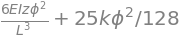

In [13]:
U = Upoutre + Uressort;

U

D'après l'équation de Lagrange, on sait que $\displaystyle\frac{d}{dt}\left[\frac{\partial T}{\partial \dot \phi}\right]+\frac{\partial U} {\partial\phi} = 0$

L'équation à résoudre est donc la suivante :
	$\left(\dfrac{33\rho SL}{35} + 4m\right)\ddot \phi + \left(\dfrac{12EI}{L^3} + \dfrac{25k}{64} \right)\phi = 0.$
    
On cherche une solution du type $\quad \phi(t) = \Phi e^{j\omega t} \quad $ conduisant à l'équation

$\left(\dfrac{12EI}{L^3} + \dfrac{25k}{64} \right) - \left(\dfrac{33\rho SL}{35} + 4M\right)\omega^2 = 0.$

La pulsation fondamentale $\omega$ a alors pour expression 

$\omega = \displaystyle\sqrt{\dfrac{\dfrac{12EI}{L^3} + \dfrac{25k}{64}}{\dfrac{33\rho SL}{35} + 4m}}$.